# Tanzanian financial services

### Setting up the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

### Importing  data

In [2]:
training_data = pd.read_csv('training.csv')

In [3]:
training_data=training_data.rename(columns ={'Q1':'Age','Q2':'Gender','Q3':'Marital_status','Q4':'Level_of_education',
                               'Q5':'Land_ownership','Q6':'Other_land_ownership','Q7':'Owning_a_mobile_phone',
                               'Q9':'Employer','Q10':'Product_sold','Q11':'Service_provided','Q13':'sending_money_out_date'
                               ,'Q15':'recent_date_money_recieved','Q14':'cash_recieved_non_domestically','Q16':'purchasing_frequency_for_using_mobile_money'
                               ,'Q17':'bill_frequency_for_using_mobile_money','Q18':'Literacy_in_Kiswhahili','Q19':'English_literacy',
                                             'Q8_1':'Salaries',"Q8_2":'Trading','Q8_3':'Service','Q8_4':'Casual_work','Q8_5':'Rental','Q8_6':'Interest',
                                             'Q8_7':'Pension','Q8_8':'Social_welfare','Q8_9':'Dependent','Q8_10':'Dont_get_money','Q8_11':'Other'
                              })

In [4]:
dict_name={1:'Male',2:'Female'}
training_data['Gender']=training_data.Gender.map(dict_name)

In [5]:
dict_name = {0:'no mobile and no service',1:'no mobile and atleast one service',2:'mobile only',3:'mobile and atleast one service'}
training_data['mobile_money_classification']=training_data.mobile_money_classification.map(dict_name)

In [6]:
dict_name = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
training_data['sending_money_out_date']=training_data.sending_money_out_date.map(dict_name)

In [7]:
dict_name = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
training_data['recent_date_money_recieved']=training_data.recent_date_money_recieved.map(dict_name)

## 1.Missing values

In [8]:
training_data.isnull().sum()

ID                                             0
Age                                            0
Gender                                         0
Marital_status                                 0
Level_of_education                             0
Land_ownership                                 0
Other_land_ownership                           0
Owning_a_mobile_phone                          0
Salaries                                       0
Trading                                        0
Service                                        0
Casual_work                                    0
Rental                                         0
Interest                                       0
Pension                                        0
Social_welfare                                 0
Dependent                                      0
Dont_get_money                                 0
Other                                          0
Employer                                       0
Product_sold        

*The data has no missing values.*

## 2.Getting descriptive data

In [9]:
training_data.describe()

,ID,Age,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,Service,...,purchasing_frequency_for_using_mobile_money,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,...,1.951508,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255
std,2731.120086,16.332148,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,...,1.580819,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000
50%,4744.500000,35.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000
75%,7105.000000,48.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000
max,9459.000000,100.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000


*This dataframe contains 7094 rows and 37 columns.
There are 7094 ID entries meaning that it is  working with 7094 people.
There are 37 series or features that are known about each individual.*
*The tabele above shows the mean,standard deviation,minimum,maximum and interquartile ranges for each column.*

# Visualization

## 3.Financial services accessed.

Text(0.5, 1.0, 'Financial services use classification')

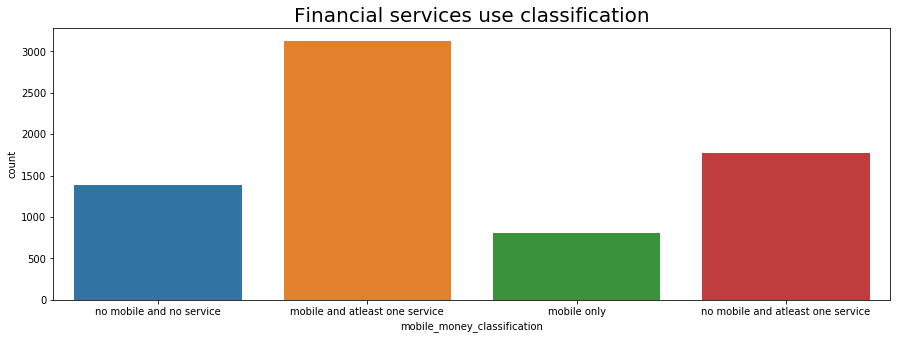

In [10]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='mobile_money_classification',data=training_data)
plt.title('Financial services use classification',fontdict=fontdict)


*The chart above shows that most people use mobile and atleast one other finacial service.*

### Financial services classification and Age

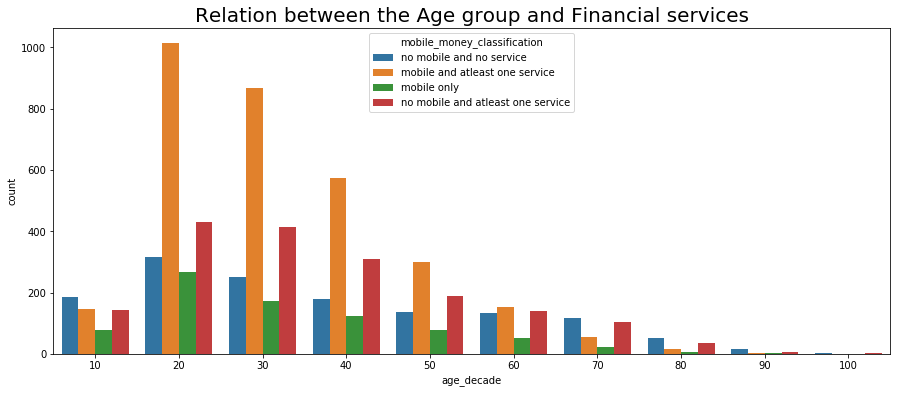

In [11]:
training_data['age_decade']=training_data.Age.apply(lambda x : int(x/10)*10)
plt.figure(figsize=(15,6))
fontdict={'fontsize':20}
sns.countplot(x='age_decade',hue='mobile_money_classification',data = training_data)
plt.title('Relation between the Age group and Financial services',fontdict=fontdict)
plt.show()

*The age group of 20s and 30s mostly use mobile money and at least one other financial service.*
*The reason could be that they have access to mobile devices such as a smart phone.*

### Financial services classification and Gender

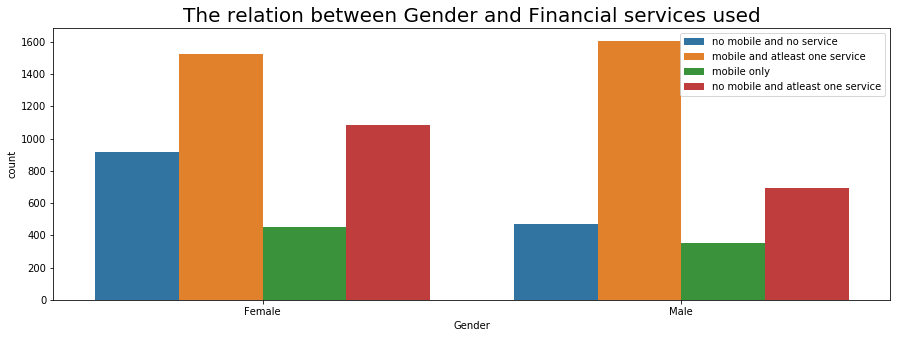

In [37]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Gender',hue='mobile_money_classification',data=training_data)
plt.legend(loc='upper right')
plt.title('The relation between Gender and Financial services used',fontdict=fontdict)
plt.show()

*Both genders do use mobile money and at least one other finacial sercive but males use it a bit more than females.*
*However females use more mobile money only than males.*

### Financial services classification and Marital Status

In [13]:
dict_name = {1:'Married',2:'Divorced',3:'Widowed',4:'Single'}
training_data['Marital_status']=training_data.Marital_status.map(dict_name)

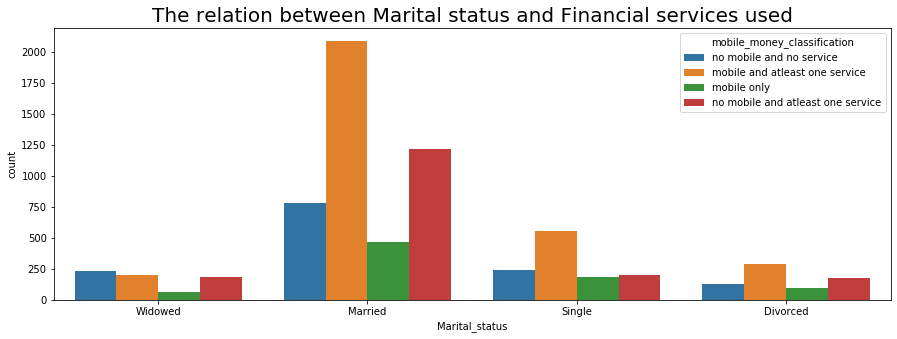

In [14]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Marital_status',hue='mobile_money_classification',data=training_data)
plt.title('The relation between Marital status and Financial services used',fontdict=fontdict)
plt.show()

*Mobile money and at least one other finacial service is mostly used by married people.*

### Financial services classification and Land ownership

In [15]:
dict_name = {1:'Yes',2:'No'}
training_data['Other_land_ownership']=training_data.Other_land_ownership.map(dict_name)

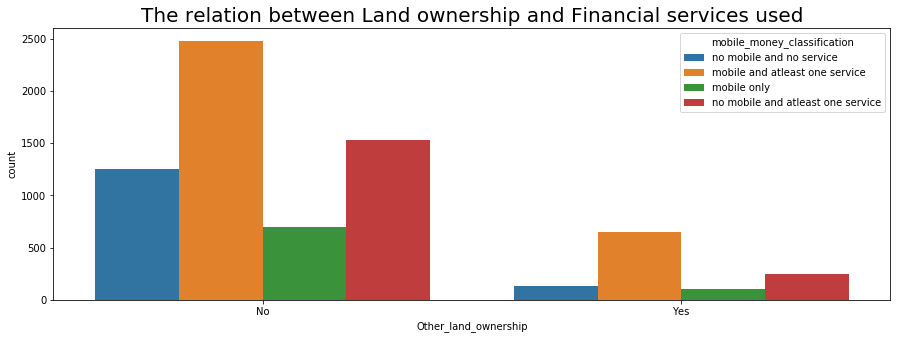

In [16]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Other_land_ownership',hue='mobile_money_classification',data=training_data)
plt.title('The relation between Land ownership and Financial services used',fontdict=fontdict)
plt.show()

*Most people  who do not own land use mobile money and at least one of the financial services.*

###  Financial services classification and the Types of income

In [17]:
data_frame = training_data[['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved','Salaries','Trading','Service','Casual_work','Rental','Interest',
                                             'Pension','Social_welfare','Dependent','Dont_get_money','Other']].copy()
data_frame_melt = data_frame.melt(id_vars=['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved'])
counts=data_frame_melt[data_frame_melt.value==1]

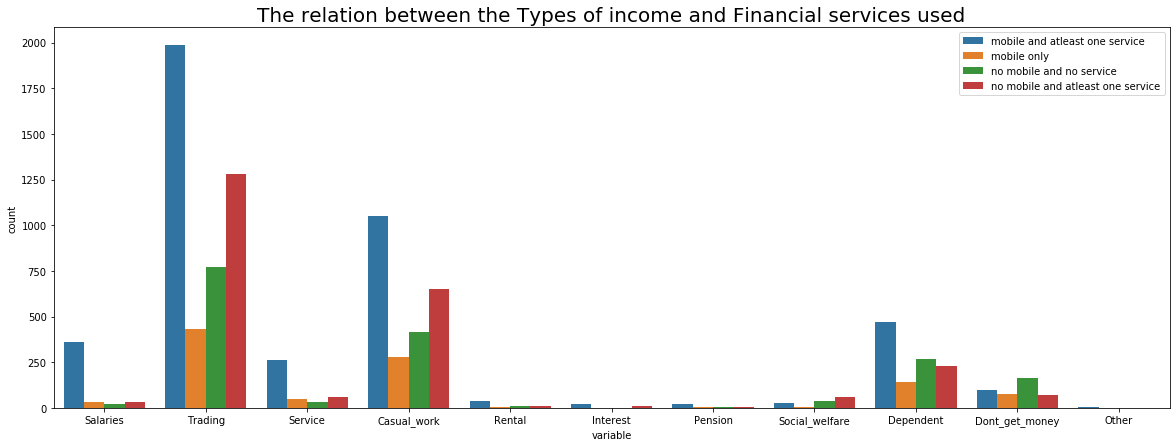

In [30]:
plt.figure(figsize=(20,7))
fontdict={'fontsize':20}
sns.countplot(counts.variable,hue= 'mobile_money_classification',data =counts)
plt.legend(loc='upper right')
plt.title('The relation between the Types of income and Financial services used',fontdict=fontdict)
plt.show()

*The source of income that uses mobile_money and at least one other financial service is Trading followed by Casual labor.*

## 4.How often the Mobile money services are used?

### How often  Mobile money services are used  and Age

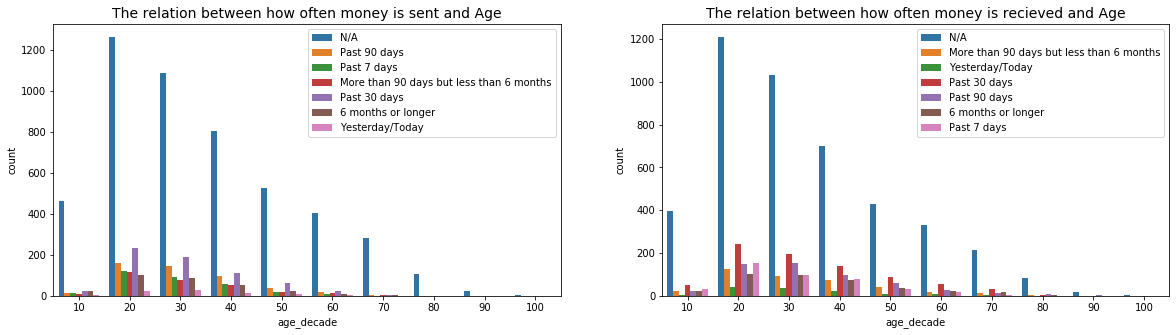

In [34]:
f, axes = plt.subplots(1, 2,figsize=(20, 5))
fontdict={'fontsize':14}

sns.countplot(x='age_decade',hue='sending_money_out_date',data=training_data, ax= axes[0])
sns.countplot(x='age_decade',hue='recent_date_money_recieved',data=training_data,ax =axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and Age',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Age',fontdict=fontdict)
plt.show()

*Most people who sent and recieved money are in the age group of 20s in the past 30 days.*

###  How often  Mobile money services are used  and Gender

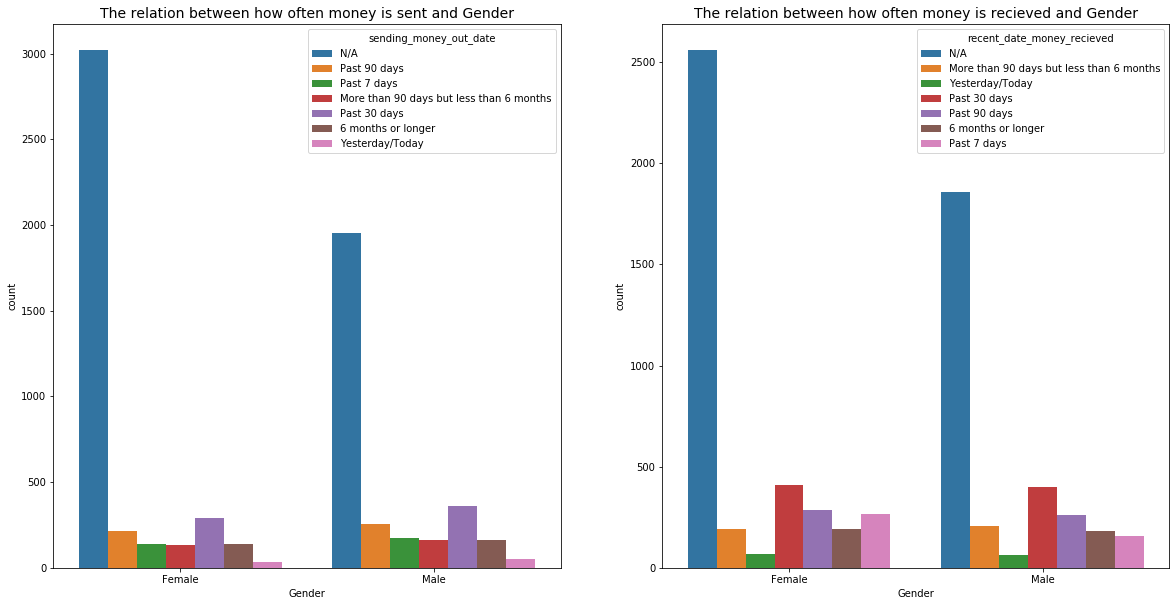

In [20]:
f, axes = plt.subplots(1, 2,figsize=(20, 10))
fontdict={'fontsize':14}
sns.countplot(x='Gender',hue='sending_money_out_date',data=training_data, ax = axes[0])
sns.countplot(x='Gender',hue='recent_date_money_recieved',data=training_data,ax = axes[1])
axes[0].set_title('The relation between how often money is sent and Gender',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Gender',fontdict=fontdict)
plt.show()

*Most people who sent money are males in the past 30 days.*
*Both males and females mostly recieved money in the last 30 days.*

###   How often  Mobile money services are used and Maritul status


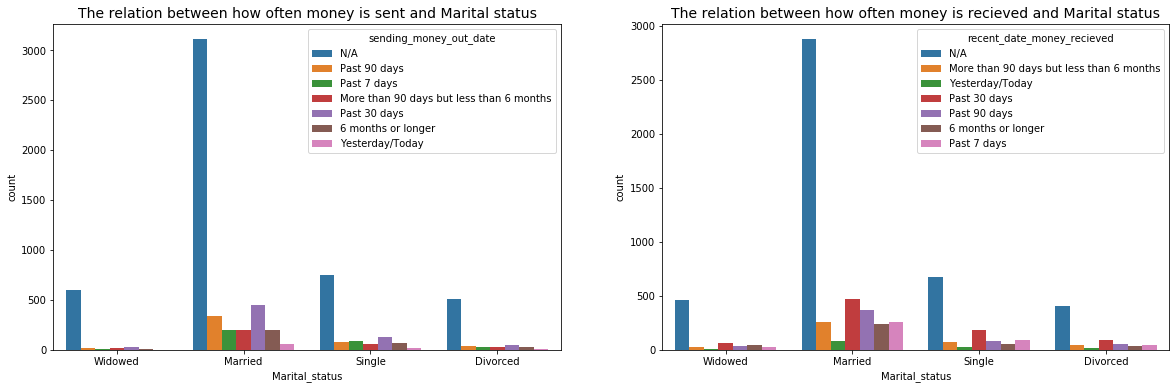

In [21]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.countplot(x='Marital_status',hue='sending_money_out_date',data=training_data,ax=axes[0])
sns.countplot(x='Marital_status',hue='recent_date_money_recieved',data=training_data,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Marital status',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Marital status',fontdict=fontdict)
fontdict={'fontsize': 20,
          'weight' : 'bold',
         'horizontalalignment': 'center'}
plt.show()


*Mostly married people sent and recieved money in the past 30 days.*

### How often  Mobile money services are used  and Land ownership

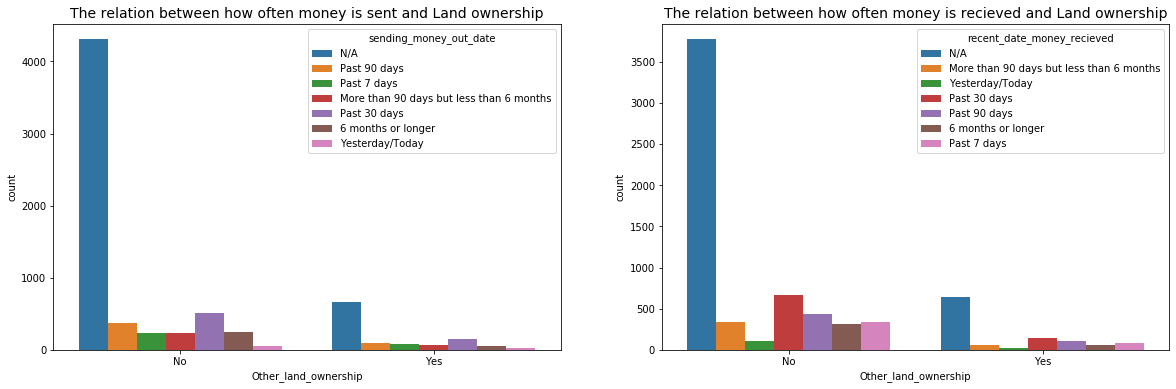

In [22]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.countplot(x='Other_land_ownership',hue='sending_money_out_date',data=training_data,ax=axes[0])
sns.countplot(x='Other_land_ownership',hue='recent_date_money_recieved',data=training_data,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Land ownership',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Land ownership',fontdict=fontdict)
plt.show()


*Mostly people of which do not own land sent and recived money in the past 30 days.*

### How often  Mobile money services are used  and  the Type of income

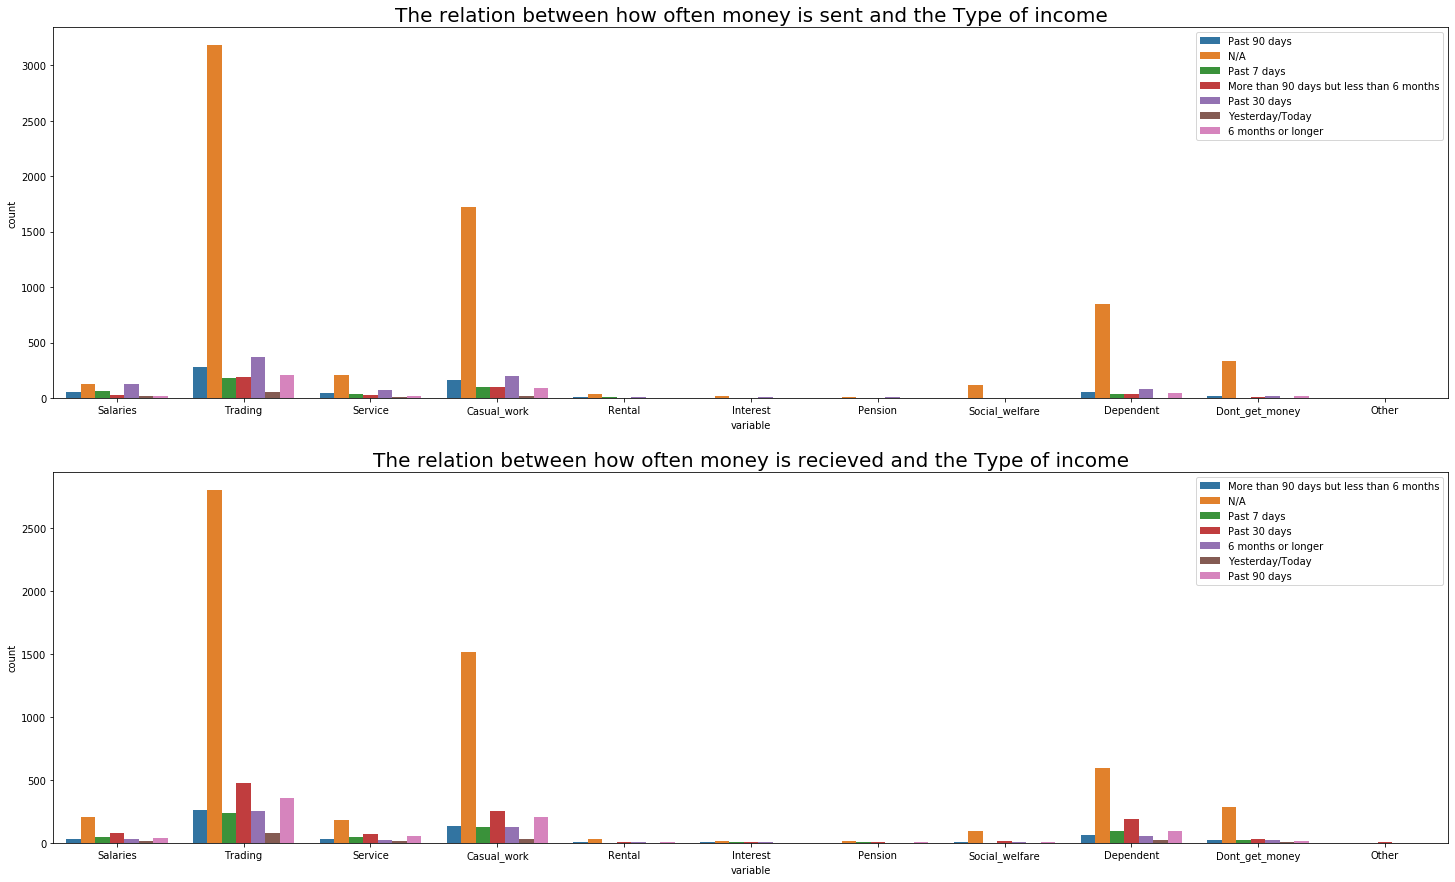

In [35]:
f, axes = plt.subplots(2, 1,figsize=(25, 15))
fontdict={'fontsize': 20}
sns.countplot(counts.variable,hue='sending_money_out_date',data=counts,ax=axes[0])
sns.countplot(counts.variable,hue= 'recent_date_money_recieved',data =counts,ax=axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and the Type of income',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and the Type of income',fontdict=fontdict)

plt.show()

*The above plot shows that the type of income that is associated with sending
and recieving money frequently is Trading in the past 30 days*

## 5.Visual geographic distribution of mobile services 

In [24]:
from folium.plugins import MarkerCluster
map_it = folium.Map(location=[-4.460442,29.811396],zoom_start=6)
marker_cluster = MarkerCluster().add_to(map_it)
geo_data = counts[['Latitude','Longitude','variable']].head(1000)
geo_data.head()
for i in range(0,len(geo_data)):
    folium.Marker(
    [geo_data.iloc[i]['Latitude'],
     geo_data.iloc[i]['Longitude']
     
     
    
    ],popup=geo_data.iloc[i]['variable']
    ).add_to(marker_cluster)
    
map_it.save('Tanzania1.html')  
map_it

*The map shows that the use of financial services is mostly distributed
around the coast or places where there is water.*

## 6.Demographic factors associated with mobile money

In [25]:
dict_name = {1:'Yes',2:'No'}
training_data['Owning_a_mobile_phone']=training_data.Owning_a_mobile_phone.map(dict_name)

In [26]:
dict_name ={-1:'N/A',1:'crops',2:'livestock product',3:'livestock',4:'aquaculture',
            5:'Agriculture products',6:'Non agriculture',7:'crafts',8:'collection',9:'processed',10:'other'}
training_data['Product_sold']=training_data.Product_sold.map(dict_name)

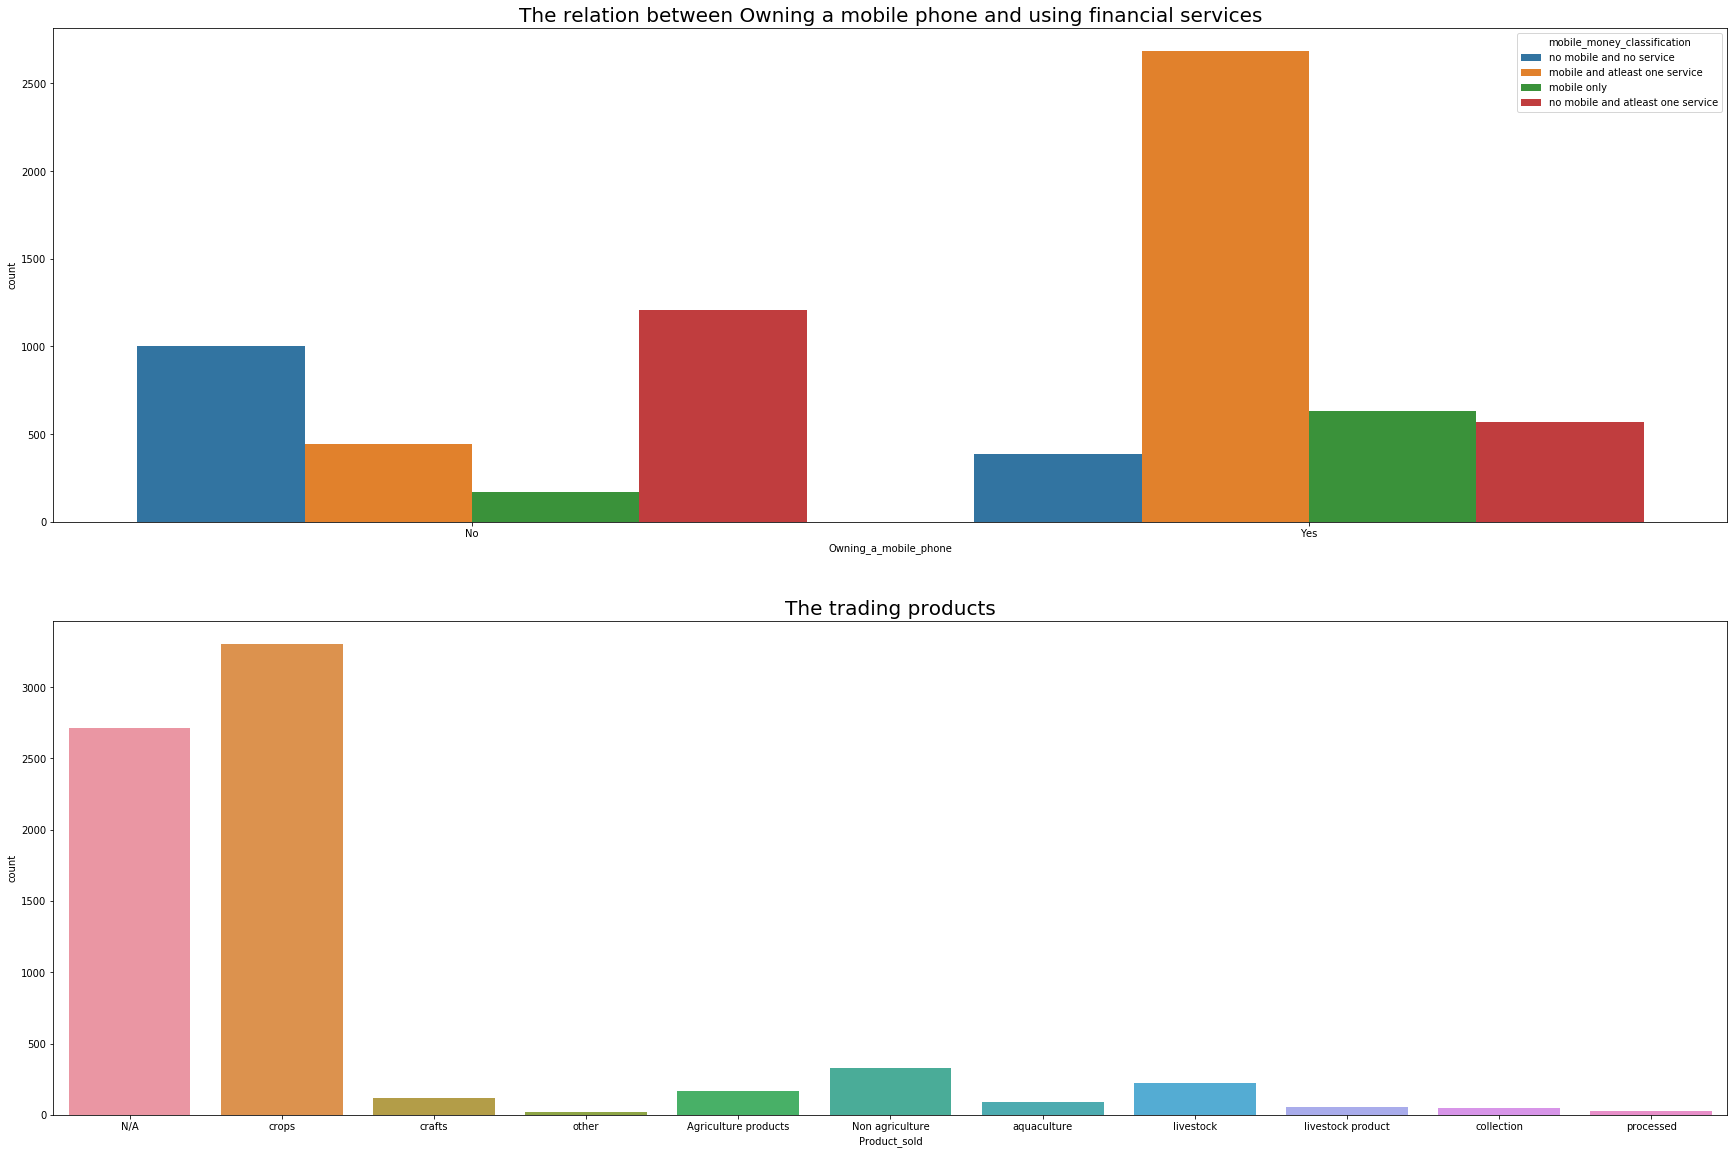

In [27]:
f, axes = plt.subplots(2, 1,figsize=(30, 20))
fontdict={'fontsize': 20}

sns.countplot(x='Owning_a_mobile_phone',hue='mobile_money_classification',data=training_data,ax=axes[0])
sns.countplot(x='Product_sold',data=training_data,ax= axes[1])
axes[0].set_title('The relation between Owning a mobile phone and using financial services',fontdict=fontdict)
axes[1].set_title('The trading products',fontdict=fontdict)
plt.show()



*More people own mobile phones and they use mobile money and at least one other financial service.
Most people trade with crops they produce(Agriculture).*

In [28]:
dict_name={1:'no formal education',2:'some primary',3:'primary completed',
           4:'post primary',5:'some secondary',6:'higher education',7:'do not know'}
training_data['Level_of_education']=training_data.Level_of_education.map(dict_name)

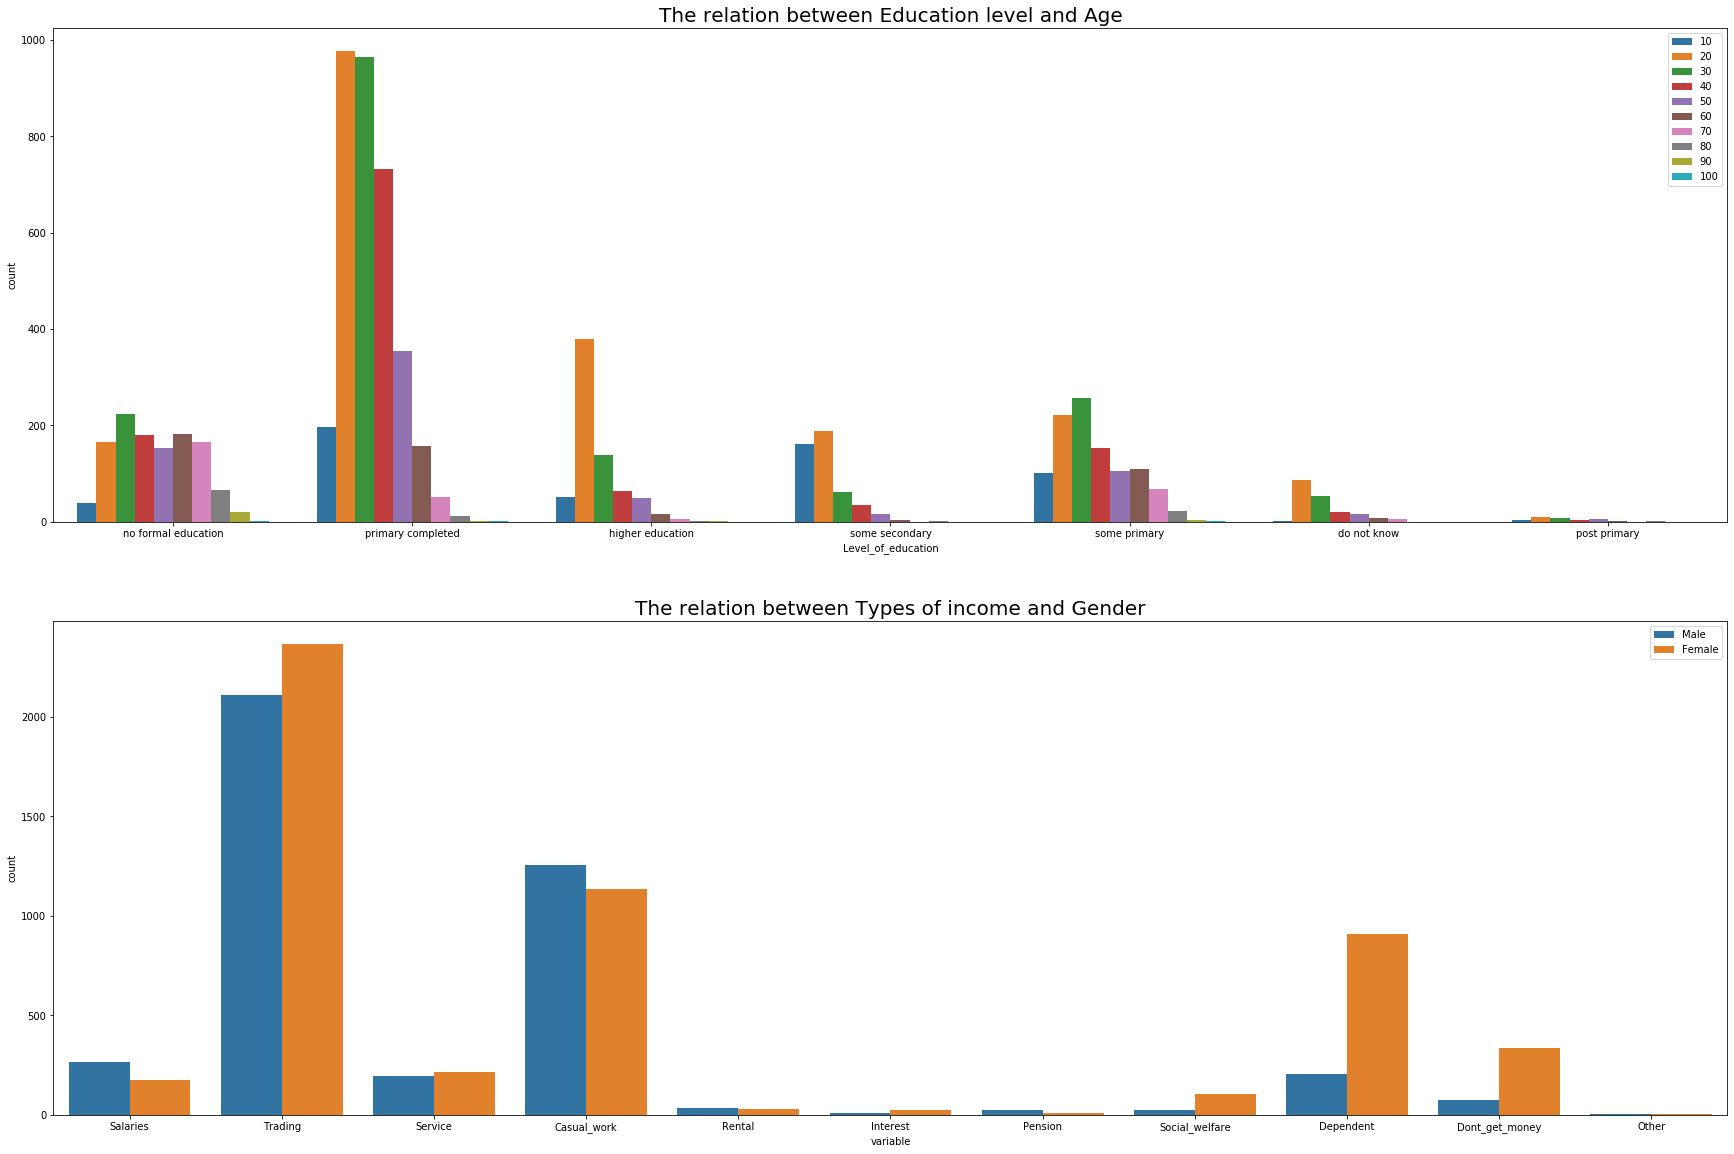

In [36]:
f, axes = plt.subplots(2, 1,figsize=(30, 20))
fontdict={'fontsize':20}
sns.countplot(x='Level_of_education',hue='age_decade',data=training_data,ax= axes[0])
sns.countplot(counts.variable,hue='Gender',data=counts,ax = axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between Education level and Age',fontdict=fontdict)
axes[1].set_title('The relation between Types of income and Gender',fontdict=fontdict)
plt.show()

*The age group of 20s is mostly educated to the level of tertiary 
followed by the age group of 30s.
Trading in crops is the highest form of trading and males take the lead*

## Conclusions about the financial services in Tanzania

*The most income comes from Trading
and it seems most trading takes place around the coast. The reason behind this
could be that most people are involved in agriculture.The mobile money services are 
mostly used by people who are in their 20s. These are the people who 
mostly have smartphones that can enable them to use mobile money services.This age group is most likey to be
literate and most likey English literate which makes it easier for them to use mobile money.Males use mobile 
money and at least one other finacial service.The reason for this could be that males are more
involved in agriculture than women.
Married people use mobile money and one other financial service compared to other marital statuses. 
The reason behind this could be that they have to send money to their spouses and children.*